In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv(r"D:\study\DATA SCIENCE\Car price\archive (1)\car data.csv")

In [7]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.shape


(301, 9)

In [11]:
df.isnull().sum().any()

False

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
obj_col = df.select_dtypes(['object']).columns
num_col = df.select_dtypes(['int', 'float']).columns

In [17]:
for col in list(obj_col):
  print(f'{col} = > {len(df[col].unique())}')
  print()

Car_Name = > 98

Fuel_Type = > 3

Selling_type = > 2

Transmission = > 2



In [19]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [22]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df.drop('Car_Name', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    int32  
 5   Selling_type   301 non-null    int32  
 6   Transmission   301 non-null    int32  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 15.4 KB


In [24]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [26]:
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


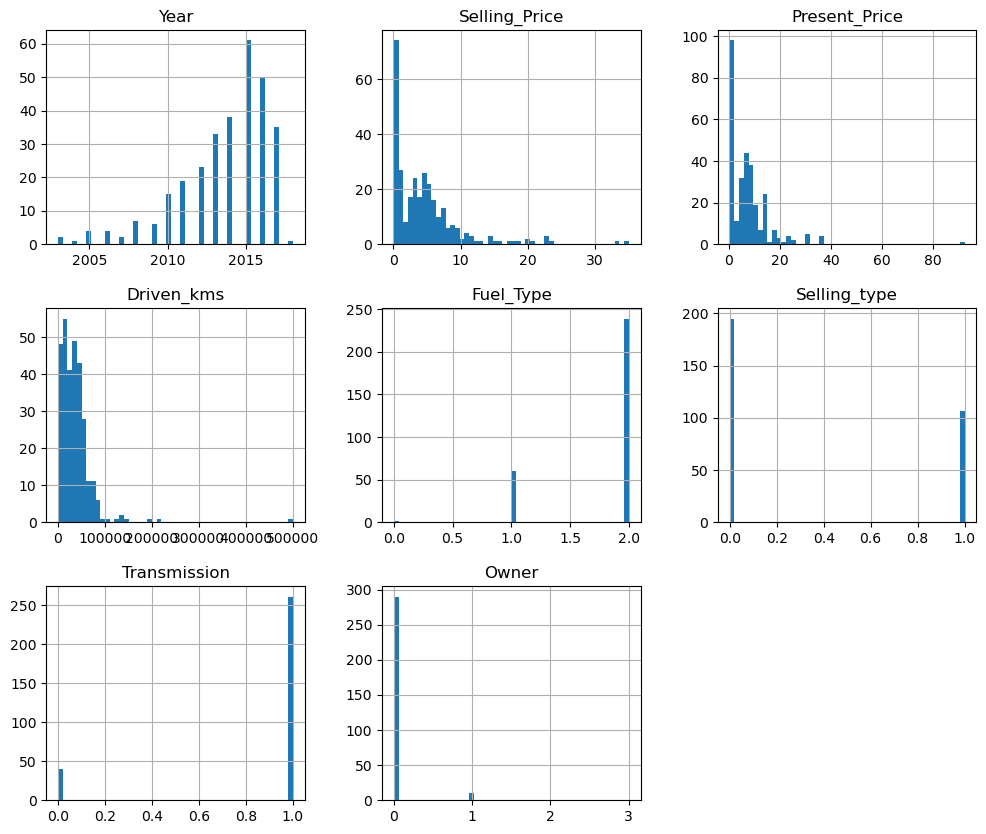

In [28]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [29]:
df['Driven_kms'] = np.log(df['Driven_kms'])
df['Selling_Price'] = np.log(df['Selling_Price'])
df['Present_Price'] = np.log(df['Present_Price'])

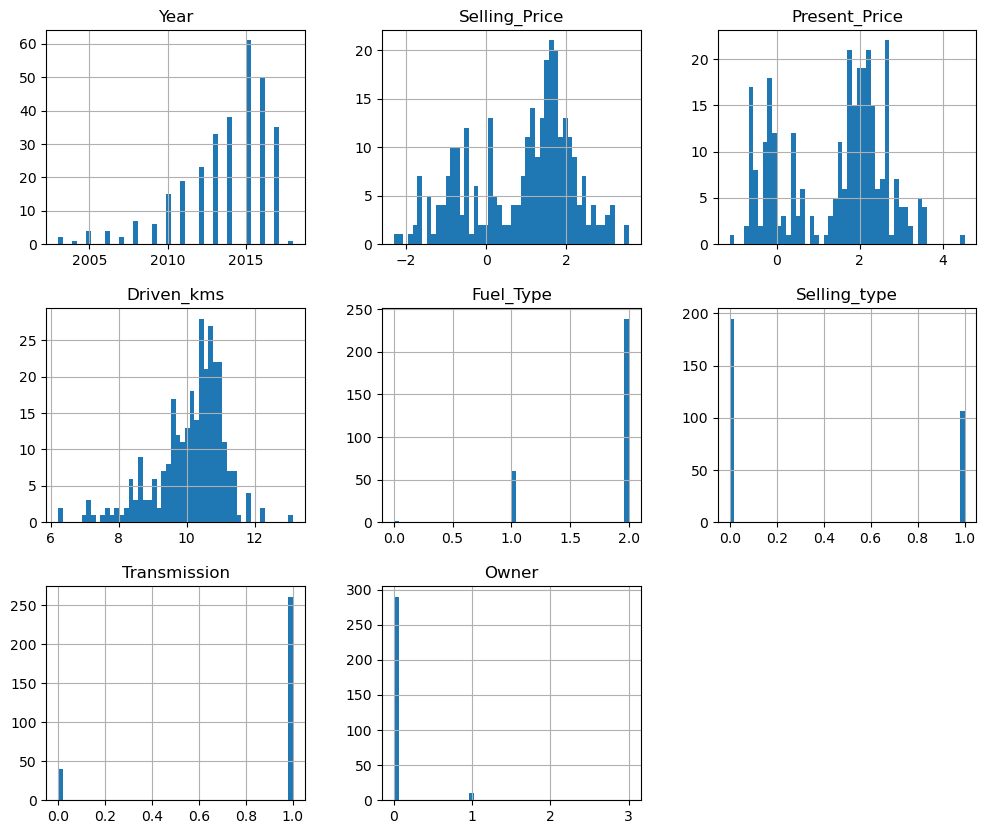

In [33]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

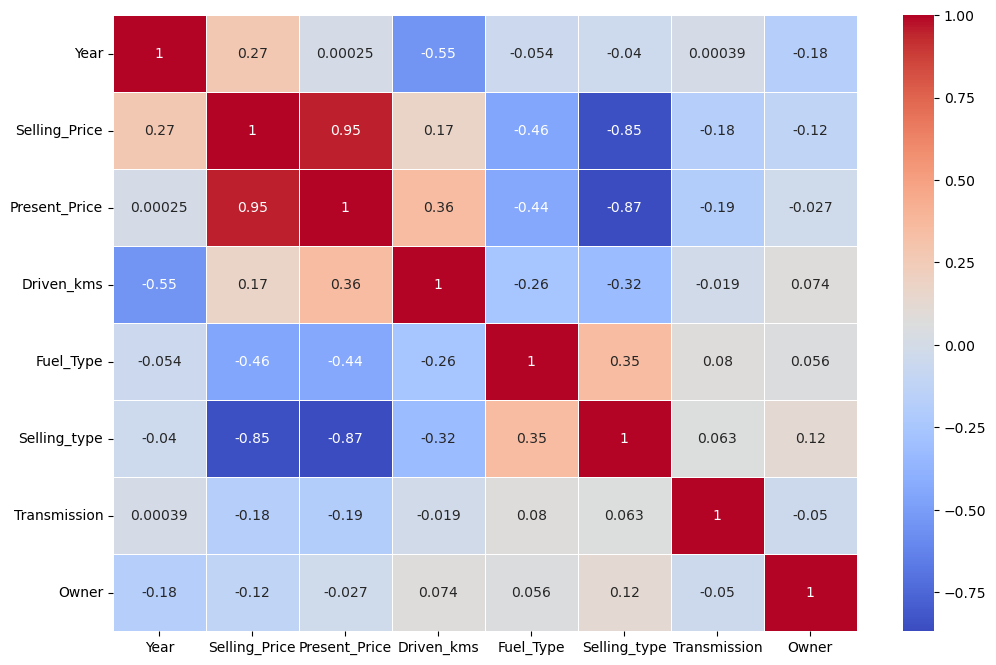

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [37]:
x = df.drop('Selling_Price', axis = 1)
y = df.Selling_Price

x, y = shuffle(x, y, random_state=42)

In [39]:
model_sfs = RandomForestRegressor(random_state = 42)


In [41]:
sfs = SFS(model_sfs, k_features = 'best', forward = True, floating = True, scoring = 'neg_root_mean_squared_error', cv = 5, n_jobs = 1, verbose = 2)

In [43]:
sfs.fit(x,y)


[2024-10-09 18:22:20] Features: 1/7 -- score: -0.4029621579500101
[2024-10-09 18:22:25] Features: 2/7 -- score: -0.23113282494712664
[2024-10-09 18:22:30] Features: 3/7 -- score: -0.22234015891209086
[2024-10-09 18:22:36] Features: 4/7 -- score: -0.21769941183093294
[2024-10-09 18:22:43] Features: 5/7 -- score: -0.21593998303490008
[2024-10-09 18:22:51] Features: 6/7 -- score: -0.21454806538246274
[2024-10-09 18:22:58] Features: 7/7 -- score: -0.21553088039646795

SequentialFeatureSelector(estimator=RandomForestRegressor(random_state=42),
                          floating=True, k_features=(1, 7),
                          scoring='neg_root_mean_squared_error', verbose=2)

In [45]:
list(sfs.k_feature_names_)

['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Owner']

In [49]:
x = df[list(sfs.k_feature_names_)]
y = df.Selling_Price

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state = 42, shuffle = True)

In [53]:
model_l = LinearRegression()
model_r = RandomForestRegressor()

In [55]:
model_l.fit(xtrain,ytrain)

LinearRegression()

In [57]:
model_r.fit(xtest,ytest)


RandomForestRegressor()

In [63]:
pred_l = model_l.predict(xtest)


mse = mean_squared_error(ytest, pred_l)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_l)
r2 = r2_score(ytest, pred_l)


In [69]:
# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Baseline predictions
baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)

# Print baseline metrics
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')


Mean Squared Error (MSE): 0.0390933613356587
Root Mean Squared Error (RMSE): 0.19772041203593194
Mean Absolute Error (MAE): 0.14201729347298303
R-squared (R2): 0.9726806309248421
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


In [71]:
pred_r = model_r.predict(xtest)

mse = mean_squared_error(ytest, pred_r)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred_r)
r2 = r2_score(ytest, pred_r)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

baseline_pred = [np.mean(ytest)] * len(ytest)
baseline_mse = mean_squared_error(ytest, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
print(f'Baseline MSE: {baseline_mse}')
print(f'Baseline RMSE: {baseline_rmse}')

Mean Squared Error (MSE): 0.010940889605717725
Root Mean Squared Error (RMSE): 0.1045987074763246
Mean Absolute Error (MAE): 0.07100206043866243
R-squared (R2): 0.9923542465795459
Baseline MSE: 1.430975994654549
Baseline RMSE: 1.196234088569018


In [73]:
model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

scores_mse = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_absolute_error')
scores_r2 = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='r2')

rmse_scores = np.sqrt(-scores_mse)

print(f'Mean MSE: {-scores_mse.mean()}')
print(f'Standard Deviation of MSE: {scores_mse.std()}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'Mean MAE: {-scores_mae.mean()}')
print(f'Standard Deviation of MAE: {scores_mae.std()}')
print(f'Mean R-squared: {scores_r2.mean()}')
print(f'Standard Deviation of R-squared: {scores_r2.std()}')

model.fit(xtrain, ytrain)
pred = model.predict(xtest)

mse_test = mean_squared_error(ytest, pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(ytest, pred)
r2_test = r2_score(ytest, pred)

print('\n\n')
print(f'Test Set MSE: {mse_test}')
print(f'Test Set RMSE: {rmse_test}')
print(f'Test Set MAE: {mae_test}')
print(f'Test Set R-squared: {r2_test}')

Mean MSE: 0.05374440426684124
Standard Deviation of MSE: 0.016302105029456483
Mean RMSE: 0.22907406021470872
Standard Deviation of RMSE: 0.03562975166331135
Mean MAE: 0.16031919493428634
Standard Deviation of MAE: 0.024234380734628254
Mean R-squared: 0.9676961988440949
Standard Deviation of R-squared: 0.00736830188040809



Test Set MSE: 0.038336571416389825
Test Set RMSE: 0.19579727121793558
Test Set MAE: 0.14802932961987994
Test Set R-squared: 0.9732094936885055
